# comparison of fitting a gaussian in ROOT and numpy

what does numpy.random.normal do?

According to [the documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) we have:

$$f(x) = \frac{1}{\sigma \sqrt{2\pi} } e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

it draws random samples according to the normal distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from ROOT import TCanvas, TH1F
%jsroot off
%matplotlib inline

Welcome to JupyROOT 6.22/06


First we crate a sample distribution

In [2]:
mean_sim = 400
sigma_sim = 40

data = np.random.normal(loc = mean_sim, scale = sigma_sim, size=10000)

we frist have a look using ROOT

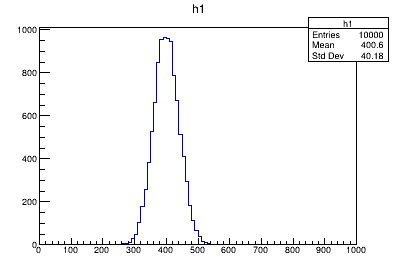

In [3]:
h1 = TH1F('h1', 'h1', 100, 0, 1000)
for ii in data:
    h1.Fill(ii)
c = TCanvas("c","c",400,300)
c.cd()
h1.Draw()
c.Draw()

Now we have a look using Numpy. Please pay attention that the parameter **range** is very important. In ROOT histograms, this task is taken care of by the Histogram object. Here you have to make sure you have the correct x-axis in Numpy histo.

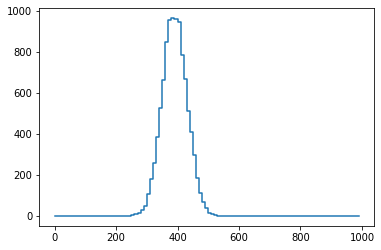

In [4]:
hist = np.histogram(data, bins=100, range=(0,1000))[0]
x = np.arange(0, 1000, 1000/100)
plt.step(x, hist)

now we define an exponential fit function

In [5]:
def fit_function(x, *p):
    # gauss
    return p[0] * np.exp(-(x - p[1]) ** 2 / (2. * p[2] ** 2))

# fit params and some initial values
y = hist
x = x
p = [10, 350, 10]

# do fit
popt, pcov = curve_fit(fit_function, x, y, p0=p)

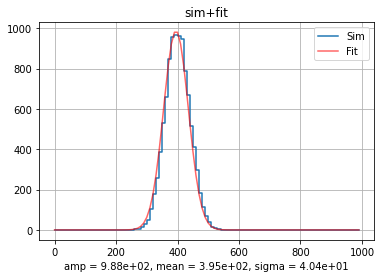

In [6]:
# plot fit and data

fig = plt.figure()
ax = fig.gca()
ax.step(x, y, label='Sim', where='post')
ax.plot(x, fit_function(x, *popt), 'r', label='Fit', alpha=0.6)
ax.set_xlabel('amp = {:0.2e}, mean = {:0.2e}, sigma = {:0.2e}'.format(popt[0], popt[1], popt[2]))
ax.set_title('sim+fit')
legend = ax.legend(loc='upper right', shadow=False)
ax.grid()

Now we do the same with ROOT

 FCN=19.4415 FROM MIGRAD    STATUS=CONVERGED      64 CALLS          65 TOTAL
                     EDM=3.33047e-12    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.90358e+02   1.20898e+01   2.18846e-02   2.38814e-07
   2  Mean         4.00638e+02   4.03622e-01   8.89658e-04  -1.39700e-06
   3  Sigma        4.02109e+01   2.81651e-01   4.21733e-06   1.09089e-03


Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


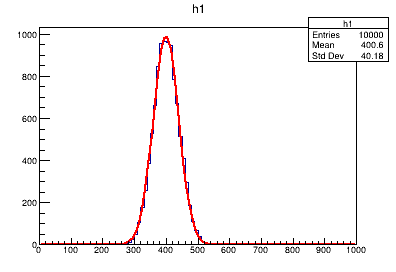

In [7]:
h1 = TH1F('h1', 'h1', 100, 0, 1000)
for ii in data:
    h1.Fill(ii)

h1.Fit('gaus', 'S')

c = TCanvas("c","c",400,300)
c.cd()
h1.Draw()
c.Draw()

In [8]:
gfit = h1.GetFunction('gaus')
const = gfit.GetParameter(0)
mean = gfit.GetParameter(1)
sigma = gfit.GetParameter(2)

In [9]:
print(f'Seed mean = {mean_sim}, sigma = {sigma_sim}')
print(f'ROOT mean = {mean}, sigma = {sigma}')
print(f'Numpy mean = {popt[1]}, sigma = {popt[2]}')

Seed mean = 400, sigma = 40
ROOT mean = 400.6383744511229, sigma = 40.210890732884494
Numpy mean = 394.98260994343974, sigma = 40.41600897066597
